# Exploratory Data Analysis of a Diabetes Dataset
## Report

Bronwyn Bowles-King

### 1. Introduction

Diabetes is a chronic disease characterised by high blood sugar levels. It results from the body's inability to produce or use insulin, a hormone that regulates glucose use (Diabetes Canada, n.d.). Diabetes is a major global health issue, with the number of adults living with diabetes increasing significantly in the past few decades (World Health Organization (WHO), 2024). 

Current estimates indicate that diabetes affects about 10.5% of the global adult population, although it also affects children (International Diabetes Federation, 2021). This is projected to rise in the future due to diet and/or a lack of medical intervention for some groups (WHO, 2024).

This report will include an analysis of a healthcare dataset on diabetes to gain an understanding of factors related to the progression of the disease. The key finding is that a higher body mass index (BMI) is the factor most closely linked to the deterioration of a patient's health in this dataset.

---

### 2. Objective of this report

The aim of this analysis is to give an overview of the data, clean it, and check for any anomalies or data quality issues (section 3). Summary statistics are provided in section 4. I will then consider individual relationships of disease progression with blood glucose levels, age, BMI, and blood pressure (BP) (section 5) (Gregg, 2023). 

Section 5 thus covers two-factor or bivariate analysis. Section 6 then covers a more complex multivariate analysis, also focused on disease progression, but using a regression model. This approach is intended to identify which factors are most strongly or weakly associated with diabetes progression. 

Ultimately, the goal is to understand this dataset better, derive insights from it, and present the findings in an understandable format. In the process, I have applied my own understanding and existing knowledge of the diabetes disease, of coding with Python, and data analysis techniques, as well as going a few steps further and trying methods I have not yet used, specifically working with standardised data and applying a regression model. 

---

### 3. Preparation steps: Data cleaning, preprocessing and inspection

Import libraries (and set notebook styling)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
from sklearn.linear_model import Ridge

In [17]:
display(HTML("""
<style>
table.dataframe th {
    background-color: #0052A3;
    color: white;
    font-size: 13px;
}
table.dataframe td {
    font-size: 12px;
    border: 1px solid #ccc;
}
table.dataframe tr:hover {
    background-color: #e6f2ff;
}
</style>
"""))

Load and preview the data

In [3]:
df = pd.read_csv('diabetes.csv')

# Remove leading apostrophes and convert columns to numeric format
df = df.map(lambda x: float(str(x).lstrip("'")) if isinstance(x, str) else x)

display(HTML(f"<span style='font-size: 13px; '>Dataframe size: {df.shape}</span>"))

In [4]:
display(HTML("<h4>Table 1: Diabetes dataframe (first five rows)</h3>"))
display(df.head(6))

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041176,-0.096346,97.0


#### 3.1 Data overview

The variables above were obtained from 442 diabetes patients. The original raw data (North Carolina University, n.d.) and the standardised data (Hastie, n.d.) are available from many sources as this is a widely used dataset for learning. In this dataset, all of the variables except progression "have been mean centered and scaled by the standard deviation times the square root of n_samples (i.e. the sum of squares of each column totals 1)" (scikit-learn, n.d.). 

The meaning of each column is given below. The last variable, progression, will be a key focus in this analysis. It is "a quantitative measure of disease progression one year after baseline" (scikit-learn, n.d.). Thus, it tells us how much the disease has gotten worse for a patient within one year. A higher value means a more advanced stage of the disease and worse outcome. 

**Table 2: Data columns (scikit-learn, n.d.)**

| Column      | Category         | Description                                                |
|-------------|----------------- |------------------------------------------------------------|
| age         | Demographics     | Age in years                                               |
| sex         | Demographics     | Gender (binary)                                            |
| bmi         | Biomarkers       | Body mass index                                            |
| bp          | Biomarkers       | Average blood pressure                                     |
| s1          | Biomarkers       | Total serum cholesterol                                    |
| s2          | Biomarkers       | Low-density lipoproteins                                   |
| s3          | Biomarkers       | High-density lipoproteins                                  |
| s4          | Biomarkers       | Total cholesterol                                          |
| s5          | Biomarkers       | Triglycerides level                                        |
| s6          | Biomarkers       | Blood sugar level                                          |
| Progression | Disease outcome  | Measure of disease progression one year after baseline     |

Essentially, s1 to s5 relate to lipids (fat) and cholesterol levels in the blood, and s6 to glucose levels. s2 and s5 are unhealthy, while s3 is healthy. s1 and s4 are both 'total' measures of cholesterol, but the values are not the same for each patient. There is likely a difference between these two that medical professionals will be interested in when looking at a patient's overall cholesterol levels, but I will not investigate this in detail. 

However, I will use regression analysis later to determine the relative association in this dataset between diabetes progression and the first 10 factors in Table 2 to see which factors would likely be of most concern. 

#### 3.2 Data cleaning

#### 3.2.1 Missing values and duplicates

The code below checks for missing values and duplicates by identifying any null or NaN cells and repeated rows. No missing values or duplicates were found.

In [5]:
duplicates = df.duplicated().sum()
display(HTML(f"<span style='font-size: 13px; '>Number of duplicate rows: {duplicates}</span>"))

display(HTML("<h4>Table 3: Missing values</h3>"))
missing = df.isnull().sum()
missing_df = missing.reset_index()
missing_df.columns = ['Column', 'Missing values']
display(HTML(missing_df.to_html(index=False)))

Column,Missing values
age,0
sex,0
bmi,0
bp,0
s1,0
s2,0
s3,0
s4,0
s5,0
s6,0


#### 3.2.2 Inspect data format
As shown in Table 4 below, all entries are float or decimal values. This is appropriate for the analysis.

In [6]:
dtypes_series = df.dtypes
dtypes_df = dtypes_series.reset_index()
dtypes_df.columns = ['Column', 'Data type']
header_html = "<h4>Table 4: Data types</h4>"
display(HTML(header_html + dtypes_df.to_html(index=False)))

Column,Data type
age,float64
sex,float64
bmi,float64
bp,float64
s1,float64
s2,float64
s3,float64
s4,float64
s5,float64
s6,float64


#### 3.2.3 Outlier detection with visualisations

Boxplots are created for every variable in Figure 1 and 2. Progression in Figure 2 is plotted separately as it is not standardised and on a different scale.

*Finding:* There appear to be values too far from the mean in these plots. Z-scores will be calculated below to identify which rows contain extreme outliers to be removed.

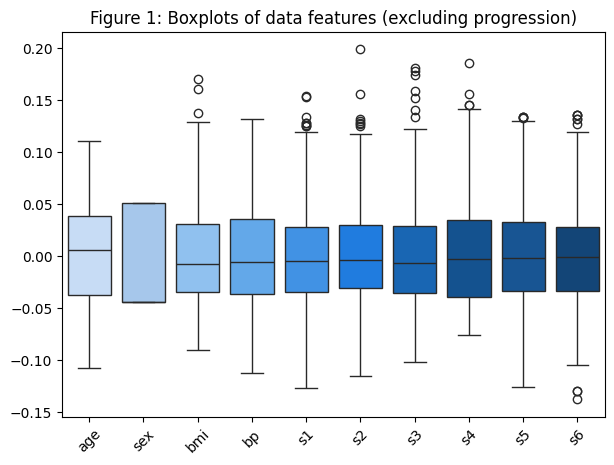

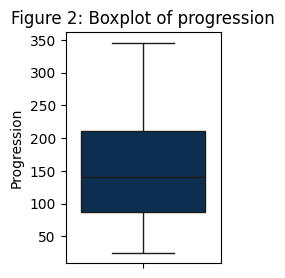

In [7]:
features = df.columns.drop('Progression')

blue_palette = ["#BFDCFD", "#9AC7F7", "#80C1FF", "#4DA9FF", "#2692FF",
         "#007BFF", "#0066CC", "#0052A3", "#0355A7", "#034587"]

plt.figure(figsize=(7, 5))
sns.boxplot(data=df[features], palette=blue_palette)
plt.title('Figure 1: Boxplots of data features (excluding progression)')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(2, 3))
sns.boxplot(y=df['Progression'], color="#022E5A")
plt.title('Figure 2: Boxplot of progression')
plt.show()

#### 3.2.4 Remove outliers based on z-scores

A z-score measures how many standard deviations a data point is from the mean of its distribution, allowing comparison across different datasets and helping to identify outliers or unusual values (Alam, 2024).

*Findings:* The z-scores show that for BMI, row 256 and 367 contain outliers. Row 123 and 230 are outliers for both s1 and s2. For s3, row 58, 260, 261, 269 and 441 are outliers, and for s4, row 123, 216, 322 and 336 are outliers. 

Upon inspection, these outliers appear to be errors in recording data that can skew the findings, and so the 12 rows containing them are dropped from the dataset (HyperionDev, 2025a). The cleaned dataset (df_2) that will be used in the analysis below includes 430 patients. 

In [8]:
# Calculate z-scores
z_scores = df.apply(lambda x: np.abs((x - x.mean()) / x.std()))

# Convert and display results as a table
outlier_dict = {}
for column in z_scores.columns:
    outlier_indices = z_scores[z_scores[column] > 3].index.tolist()
    if outlier_indices:
        outlier_dict[column] = outlier_indices

outlier_df = pd.DataFrame({
    'Column': list(outlier_dict.keys()),
    'Outlier rows': [', '.join(map(str, v)) for v in outlier_dict.values()]
})

display(HTML("<h4>Table 5: Dataset outliers based on z-scores<h4>"))
display(HTML(outlier_df.to_html(index=False)))

Column,Outlier rows
bmi,"256, 367"
s1,"123, 230"
s2,"123, 230"
s3,"58, 260, 261, 269, 441"
s4,"123, 216, 322, 336"


In [9]:
# Collect and drop outlier rows 
all_outliers = set()
for rows in outlier_dict.values():
    all_outliers.update(rows)

df_2 = df.drop(index=all_outliers)

display(HTML(
    f"<span style='font-size: 13px; '>New dataframe dimensions: {df_2.shape}</span>"
))

#### 4. Summary statistics

Table 6 below shows the summary statistics about the diabetes dataset. A disadvantage of this data on its own is that we cannot tell what the average age, BMI, blood sugar levels, etc. were in their original units (years for age, kg/m² for BMI, mmol/L for blood sugar, etc.) due to standardisation. 

However, I was able to find the original, unstandardised dataset on the North Carolina University (n.d.) website and note here briefly that the average age is 48.52 years, the average BMI is 26.38, and the average blood sugar level is 91.26 mmol/L (see Table 7 below). The average age shows that most patients are likely middle-aged. The BMI average is in the overweight category (Centers for Disease Control and Prevention, 2024). The blood sugar level average is on the higher end of the normal range, which is plausible for diabetes patients on treatment (WHO, n.d.).

Nevertheless, in the dataset I will work with in the rest of this report, all variables except disease progression have been standardised or mean-centred and on the same relative scale (Hastie, n.d.). The mean is approximately 0. The values are unitless and range between about -0.1 and +0.1. This is done so that the factors can be compared, which is difficult to do without standardisation, and this is an advantage of the standardised data we have (HyperionDev, 2025b). 

The minimum and maximum values show the highest and lowest values away from the mean, but these values are still small due to the scaling (Arshad, n.d.). Values too far from the mean have been removed in the previous step with z-score detection (Alem, 2024).

In [10]:
display(HTML("<h4>Table 6: Summary statistics (standardised values except Progression)<h4>"))
display(HTML(df_2.describe().T.to_html()))

,count,mean,std,min,25%,50%,75%,max
age,430.0,-0.000049,0.047963,-0.107226,-0.037299,0.005383,0.038076,0.110727
sex,430.0,0.000137,0.047629,-0.044642,-0.044642,-0.044642,0.050680,0.050680
bmi,430.0,-0.000932,0.046149,-0.090275,-0.034229,-0.007284,0.030440,0.137143
bp,430.0,0.000094,0.047400,-0.112399,-0.033213,-0.005670,0.035360,0.132044
s1,430.0,-0.001534,0.046511,-0.126781,-0.034592,-0.004321,0.025950,0.133274
s2,430.0,-0.000927,0.046147,-0.115613,-0.030358,-0.003819,0.028200,0.131461
s3,430.0,-0.001143,0.044069,-0.102307,-0.032356,-0.006584,0.026550,0.140681
s4,430.0,-0.000991,0.044946,-0.076395,-0.039493,-0.002592,0.034309,0.141322
s5,430.0,-0.000646,0.047353,-0.126097,-0.034203,-0.003301,0.031657,0.133597
s6,430.0,-0.000654,0.047600,-0.137767,-0.034215,-0.001078,0.027917,0.135612


In [11]:
df_raw = pd.read_csv('diabetes_raw_data.csv')

average_age = round(df_raw['AGE'].mean(), 2)
average_bmi = round(df_raw['BMI'].mean(), 2)
average_bg = round(df_raw['S6'].mean(), 2)

def strip_trailing_zeros(val):
    return str(val).rstrip('0').rstrip('.') if '.' in str(val) else str(val)

averages = pd.DataFrame({
    'Variable': ['Age', 'BMI', 'Blood glucose'],
    'Average': [strip_trailing_zeros(average_age),
                strip_trailing_zeros(average_bmi),
                strip_trailing_zeros(average_bg)],
    'Units': ['years', 'kg/m²', 'mmol/L']
})

html_header = "<h4>Table 7: Average age, BMI and blood glucose in raw dataset</h4>"
display(HTML(html_header + averages.to_html(index=False)))

Variable,Average,Units
Age,48.52,years
BMI,26.38,kg/m²
Blood glucose,91.26,mmol/L


---
### 5. Bivariate data analyses 

In the following four plots, I will compare disease progression with four other variables in the dataset. In all these figures, the blue dots represent patients and the y-axis shows their disease progression or how much their diabetes worsened after one year. A high progression value means a more severe disease progression (scikit-learn Developers, n.d.). 

The scattering of dots shows the extent of variability among individuals. The x-axis represents standardised values of blood glucose, age, BMI or BP. The red line is the regression line or line of best fit. It shows the general trend in the data. The red shaded area is the confidence interval, indicating the degree to which we can be confident in the general trend due to variability in the data (Kumbhar, 2024).

#### 5.1 Blood glucose levels and disease progression

First, I will compare blood glucose levels (s6) and disease progression. It can be assumed that these factors will have a clear, direct and positive relationship for diabetes patients (Diabetes Canada, n.d.). 

In Figure 3 below, there is a noticeable upward trend so that as blood glucose levels increase in patients, diabetes severity after one year clearly increases. However, the points are quite widely scattered around the line, meaning blood glucose at the time of testing is not as strongly associated with diabetes progression as one might initially assume, at least in this dataset. 

The wider confidence interval (red shaded area) around the first and last third of the diagram along the x-axis (s6) also reflects this individual variability (Kumbhar, 2024). Some of this variability might be due to testing bias in that we only have one sample for each patient. We do not have data on their blood glucose levels over time so that a general trend can be established for each person.

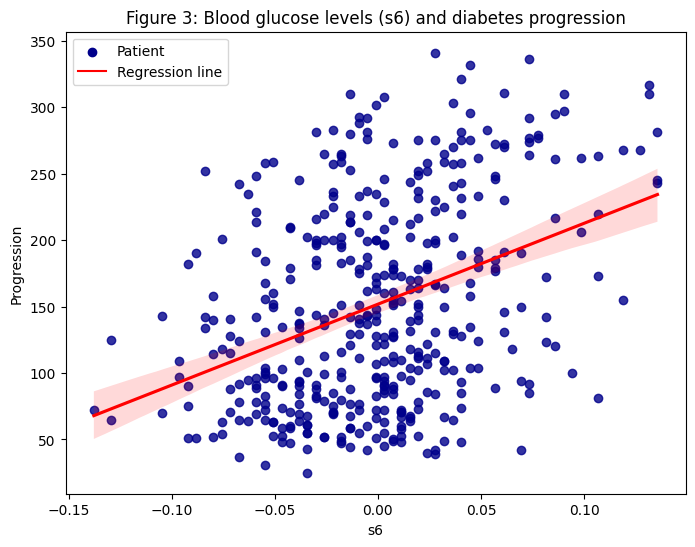

In [12]:
plt.figure(figsize=(8, 6))
sns.regplot(x='s6', y='Progression', data=df_2, color='darkblue', line_kws={'color': 'red'})
plt.scatter([], [], color='darkblue', label='Patient', marker='o') 
plt.plot([], [], color='red', label='Regression line')  
plt.legend(loc='upper left')
plt.title('Figure 3: Blood glucose levels (s6) and diabetes progression')
plt.show()

*Findings:* The positive slope in Figure 3 suggests patients with high glucose in their blood experience worse disease progression and thus likely more severe symptoms of diabetes in general. Nevertheless, there is variability in the data. Each patient would thus need to be evaluated individually based on a variety of factors unique to them and by a medical professional who can advise them accordingly. 

#### 5.2 Age and disease progression

I will now look at the age of patients and diabetes progression in this dataset. I have not examined gender because it is unclear which standardised value (~0.051 and ~-0.045) is male and which is female in the dataset and so it is difficult to draw conclusions from this.

In Figure 4 below, there is a slight upward trend so that as age increases, diabetes severity tends to increase slightly. However, the points are quite widely scattered around the line, meaning age alone is not a strong predictor of diabetes progression, at least in this dataset. The positive slope suggests older patients may experience more symptoms, yet there is still much variability among individuals. 

Looking outside the dataset for the reason for this trend, it might be because there are two types of diabetes and we are not sure which one each person has. Some people are born with diabetes or it presents at a young age (Type 1) and others develop it later in life (Type 2), although the age of onset and diagnosis in both types can still vary widely (Diabetes Canada, n.d.). 

Thus, younger patients with Type 1 could present with more severe progression at times, especially if they do not monitor their blood sugar carefully (Al-Saeed et al., 2016). Older people who have been developing the disease slowly over time, especially due to diet, may sometimes show less severe progression in the same time period, and they may improve more quickly with treatment and diet changes (Diabetes Canada, n.d.).

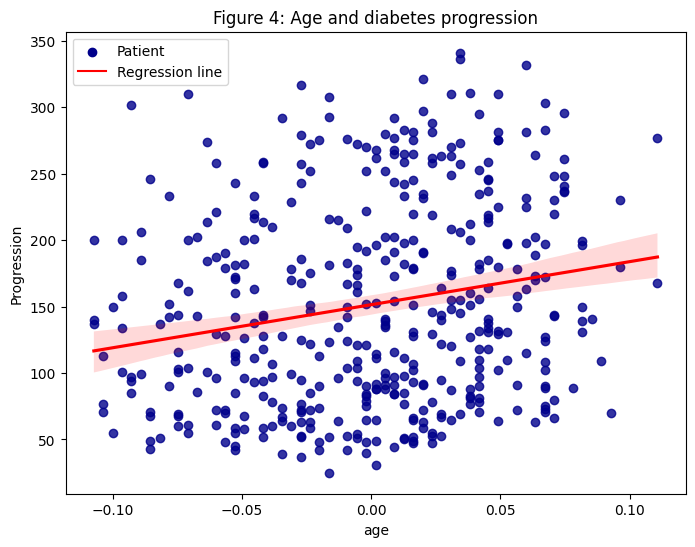

In [13]:
plt.figure(figsize=(8, 6))
sns.regplot(x='age', y='Progression', data=df_2, color='darkblue', line_kws={'color': 'red'})
plt.scatter([], [], color='darkblue', label='Patient', marker='o') 
plt.plot([], [], color='red', label='Regression line')  
plt.legend(loc='upper left')
plt.title('Figure 4: Age and diabetes progression')
plt.show()

*Findings:* Overall, age is a factor of moderate concern in diabetes progression, with older people having slightly worse outcomes generally, but there are other critical factors to consider, such as diabetes type, treatment availability and adherence, diet, and general health management (Diabetes Canada, n.d.). Therefore, young people are also at risk of health deterioration due to diabetes and will need ongoing medical treatment (Al-Saeed et al., 2016).

#### 5.3 BMI and disease progression

A high BMI (and high BP, which will be considered in the next section) is already a known risk factor for diabetes, but for this analysis, I am interested in how this looks for the particular group of patients in the dataset (Delach, 2014). A scatter plot has been created for disease progression compared to BMI below (Figure 5). 

In Figure 5, there is a clear upward trend so that as BMI increases, diabetes progression also trends upward. The blue points are spread around the line to some extent, showing variability as each patient's case is unique to them. However, a strong positive slope is apparent, indicating a meaningful association. Thus, people with a higher BMI are suffering with diabetes more and not tending to show an improvement in their symptoms. 

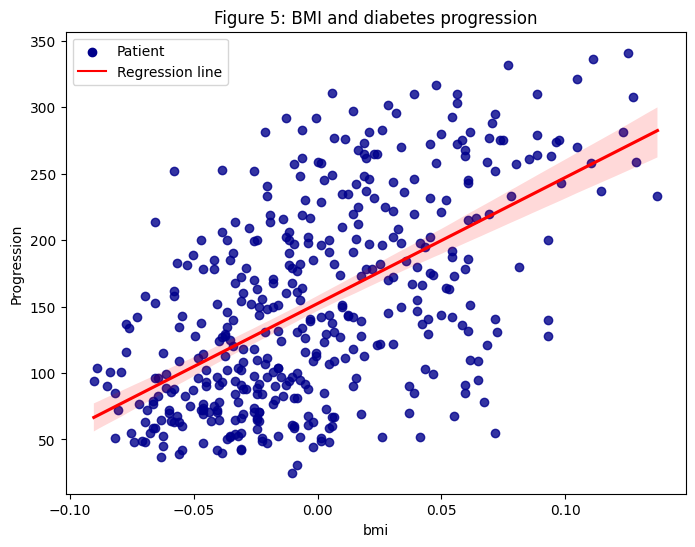

In [14]:
plt.figure(figsize=(8, 6))
sns.regplot(x='bmi', y='Progression', data=df_2, color='darkblue', line_kws={'color': 'red'})
plt.scatter([], [], color='darkblue', label='Patient', marker='o') 
plt.plot([], [], color='red', label='Regression line')  
plt.legend(loc='upper left')
plt.title('Figure 5: BMI and diabetes progression')
plt.show()

*Finding:* Overall, a higher BMI is clearly associated with worse diabetes outcomes over time in the sample. This fits with the many previous studies on diabetes and weight gain (Delach, 2014). 

#### 5.4 Blood pressure (BP) and disease progression

Figure 6 shows an upward trend, like Figure 5 above. As BP increases, diabetes progression tends to increase. This relationship is positive, but the points are more widely scattered than in the BMI plot, suggesting the association is weaker than for BMI, but it is present.

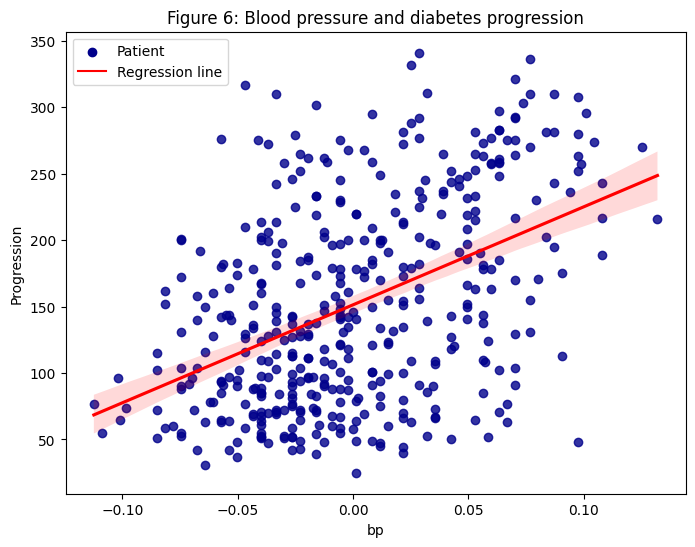

In [15]:
plt.figure(figsize=(8, 6))
sns.regplot(x='bp', y='Progression', data=df_2, color='darkblue', line_kws={'color': 'red'})
plt.scatter([], [], color='darkblue', label='Patient', marker='o') 
plt.plot([], [], color='red', label='Regression line')  
plt.legend(loc='upper left')
plt.title('Figure 6: Blood pressure and diabetes progression')
plt.show()

*Findings:* Higher BP is associated with worse diabetes progression in the sample. This fits with the many previous studies on diabetes and BP (Delach, 2014). BMI appears to have a stronger association with progression than BP, but both represent relevant medical factors to consider in relation to how diabetes develops in patients over time.

---
### 6. Multi-factor regression analysis

Gallo (2015) explains that regression analysis is a way of mathematically sorting determining which variables have an impact on each other. A **dependent variable** is selected, which is the main factor or target you want to understand. In this case, **disease progression** of is primary concern and is thus the dependent variable. 

The **independent variables** are those that we measure the dependent variable against when we suspect some association between them (Gallo, 2015). Here, we are concerned with how much the data indicates progression is associated with:

* Age       
* Sex         
* BMI         
* BP                                   
* Total serum cholesterol (s1)                              
* Low-density lipoproteins (s2) 
* High-density lipoproteins (s3)                    
* Total cholesterol (s4)     
* Log of serum triglycerides level (s5)   
* Blood glucose level (s6)

Note that the variable sex is included to show its relationship with diabetes progression. Although it is a binary value in the dataset, I am not sure which is male and which is female. As we shall see in the figure, however, gender is relatively weakly associated with disease progression overall and there are several other factors in the dataset more strongly associated with it.

In this case, I will use the **Ridge regression** method from the sklearn module (DataCamp, 2022; scikit-learn Developers, 2025). Ridge regression is a linear model designed to prevent "overfitting" and ensure a more reliable outcome (Murel & Kavlakoglu, 2023). It is applied here to identify which features in this diabetes dataset are most predictive of disease progression. The independent variables must be standardised first before performing Ridge regression, which is the case for our dataset already. However, the target or independent variable progression does not need to be standardised (Dave, 2020).

In Ridge Regression, the **absolute coefficient value** is the result of a calculation to determine the impact of each feature on the dependent variable (here, disease progression) (Murel & Kavlakoglu, 2023). Low coefficients show a weaker connection and high coefficients show stronger association between factors. The results are visualised in a sorted barplot (Figure 7) with health factors on the y-axis, the absolute coefficient value on the x-axis, and the blue bars are shaded depending on the strength of the relative association.

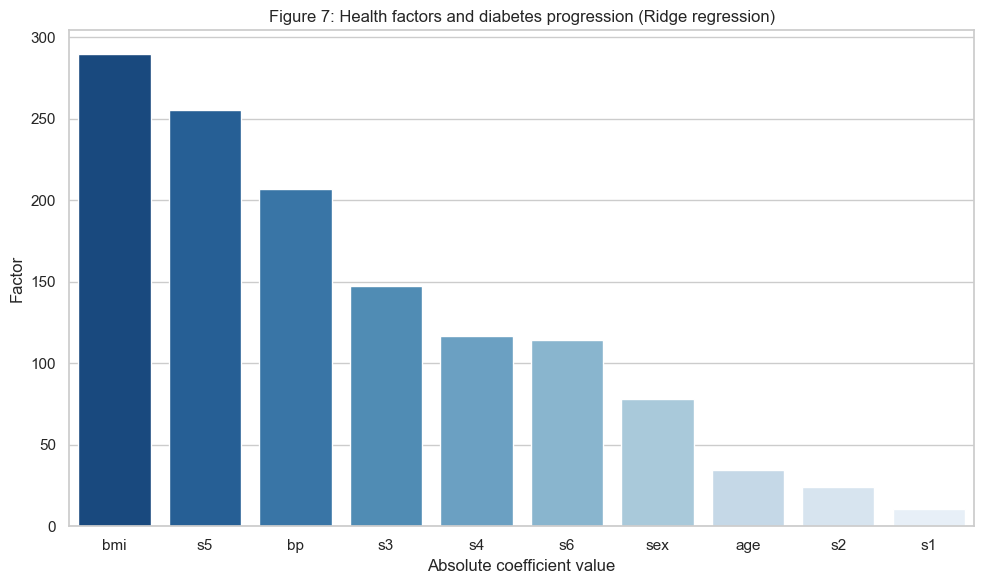

In [16]:
x = df_2.drop(columns=['Progression'])
y = df_2['Progression']

model = Ridge(alpha=1.0)
model.fit(x, y)

importances = pd.Series(np.abs(model.coef_), index=x.columns)
importances_sorted = importances.sort_values(ascending=False)

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(
    y=importances_sorted.values,
    x=importances_sorted.index,
    hue=importances_sorted.index,     
    palette='Blues_r',
    legend=False                     
)
plt.title('Figure 7: Health factors and diabetes progression (Ridge regression)')
plt.xlabel('Absolute coefficient value')
plt.ylabel('Factor')
plt.tight_layout()
plt.show()


*Findings:* BMI is most strongly associated with diabetes progression, followed by serum triglycerides level (s5) (unhealthy lipid (fat) levels in the blood), and BP (Mayo Clinic, n.d.). These factors, along with diabetes, are closely related to diet and weight gain. 

High-density lipoproteins (s3), total cholesterol (s4), and blood sugar level (s6) appear to have a more moderate association with diabetes progression compared to BMI, s5 and BP - at least in this sample - but they should certainly be considered if the levels are unhealthy, especially blood glucose. The moderate association between disease progression and blood sugar level can result from diabetes treatment that the patients are already on. Gender, age, low-density lipoproteins (s2), and total serum cholesterol (s1) have the lowest association. 

Overall, weight- and diet-related factors seem most strongly associated with disease progression in this dataset, while demographic factors of age and gender are not as clearly related. This dataset thus backs up what is already known: diabetes can be managed with healthy behaviours and good healthcare (Diabetes Canada, n.d.; Delach, 2014). However, the spread of datapoints in the bivariate analyses (section 5) shows that individuals can vary widely and each patient likely needs a medical approach suited to their needs and symptoms.

---

### 7. Conclusion

This notebook provided a comprehensive exploratory analysis of the diabetes dataset, focusing on understanding, cleaning, and modelling the data to identify key factors associated with disease progression. Through careful data cleaning, including handling missing values, removing duplicates, and addressing outliers using z-scores, I ensured data quality and reliability. I applied a variety of visualisation techniques, including boxplots, scatterplots, and regression lines, to explore univariate and bivariate relationships. 

The use of Ridge regression enabled multivariate analysis, highlighting the relative importance of each feature in predicting diabetes progression. Key findings revealed that BMI, unhealthy fats, and blood pressure are the strongest predictors of disease progression, while demographic factors such as age and gender are less influential in this sample. 

I have worked with Jupyter Notebook before several times, but throughout this process, I deepened my understanding of data science methods and Python modules such as pandas, seaborn, and scikit-learn. I also gained practical experience in applying statistical reasoning to real-world health data.

**References**

Alem, I. (2024). Detecting Outliers Using Z-score - part 2. Medium. https://medium.com/@irshadalamtech/detecting-outliers-using-z-score-part-2-85297f54ea84

Al-Saeed, A.H., Constantino, M., Molyneaux, L.M., D'Souza, M., Limacher-Gisler, F., Luo, C. et al. (2016). An Inverse Relationship Between Age of Type 2 Diabetes Onset and Complication Risk and Mortality: The Impact of Youth-Onset Type 2 Diabetes. *Diabetes Care*, 39: 823-829.

Arshad, M. (n.d.). Standardization Statistics: Understanding and Applying. https://decodingdatascience.com/standardization-statistics-understanding-and-applying

Centers for Disease Control and Prevention. (2024). Adult BMI Calculator. https://www.cdc.gov/bmi/adult-calculator/index.html

DataCamp. (2022). Lasso and Ridge Regression in Python Tutorial. https://www.datacamp.com/tutorial/tutorial-lasso-ridge-regression

Dave, A. (2020). Building and Regularizing Linear Regression Models in Scikit-learn. QuantInsti. https://blog.quantinsti.com/linear-regression-models-scikit-learn

Delach, K. (2014). Penn Study Results Confirm BMI is a Direct Cause of Type 2 Diabetes and High Blood Pressure. University of Pennsylvania. https://penntoday.upenn.edu/news/penn-study-results-confirm-bmi-direct-cause-type-2-diabetes-and-high-blood-pressure

Diabetes Canada. (n.d.). What is diabetes? https://www.diabetes.ca/about-diabetes/what-is-diabetes

EPA. (2025). Exploratory Data Analysis. https://www.epa.gov/caddis/exploratory-data-analysis

Gallo, A. (2015). Refresher on Regression Analysis: Understanding one of the most important types of data analysis. https://hbr.org/2015/11/a-refresher-on-regression-analysis

Gregg, E. W., Buckley, J., Ali, M. K., Davies, J., Flood, D., Mehta, R. et al. (2023). Improving health outcomes of people with diabetes: target setting for the WHO Global Diabetes Compact. *Lancet*, 401(10384): 1302-1312. https://pmc.ncbi.nlm.nih.gov/articles/PMC10420388

Hastie, T. (n.d.). Diabetes data for "Least Angle Regression" paper. https://hastie.su.domains/Papers/LARS/diabetes.sdata.txt

HyperionDev. (2025a). Data Cleaning and Preprocessing. Course materials. Private repository, GitHub.

HyperionDev. (2025b). Exploratory Data Analysis. Course materials. Private repository, GitHub.

International Diabetes Federation. (2021). Diabetes now affects one in 10 adults worldwide. https://idf.org/news/diabetes-now-affects-one-in-10-adults-worldwide

Jupyter Team. (2015). Apply Custom CSS. https://jupyter-notebook.readthedocs.io/en/stable/custom_css.html 

Kumbhar, S. (2024). Understanding Correlation and Confidence Intervals: A Simple Guide. Medium. https://medium.com/@sayalisureshkumbhar/understanding-correlation-and-confidence-intervals-a-simple-guide-bc857bdca646

Mayo Clinic. (n.d.). Triglycerides: Why do they matter? https://www.mayoclinic.org/diseases-conditions/high-blood-cholesterol/in-depth/triglycerides/art-20048186

Murel, J. & Kavlakoglu, E. (2023). What is ridge regression? IBM. https://www.ibm.com/think/topics/ridge-regression

North Carolina University. (n.d.). Diabetes dataset. https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt

pandas. (2024). isnull. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.isnull.html

Python Software Foundation. (2024). Counter. https://docs.python.org/3/library/collections.html#collections.Counter

Rathbone, M. (2024). Master Markdown Tables: A Complete Guide & Tips. Markdown Tools. https://blog.markdowntools.com/posts/markdown-table-ultimate-guide

scikit-learn Developers. (n.d.). 8.1.2. Diabetes dataset. https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset 

scikit-learn Developers. (2025). Ridge. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

StackOverflow. (2014). Detect and exclude outliers in a pandas DataFrame. https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-a-pandas-dataframe

WHO. (n.d.). Indicator Metadata Registry: Body mass index (BMI). https://www.who.int/data/gho/indicator-metadata-registry/imr-details/2380

WHO. (2024). Urgent action needed as global diabetes cases increase four-fold over past decades. https://www.who.int/news/item/13-11-2024-urgent-action-needed-as-global-diabetes-cases-increase-four-fold-over-past-decades